In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
import seaborn as sns 
import time
import sklearn.metrics as metrics

# Part A: Data Cleaning

In [2]:
df = pd.read_csv('bottle.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [4]:
df.shape

(864863, 74)

In [5]:
df = df.loc[:,['T_degC', 'Salnty', 'STheta','O2ml_L','Depthm']]

In [6]:
df.dropna(subset=["T_degC", "Salnty", "STheta",'O2ml_L','Depthm'], inplace=True)

In [7]:
df.shape

(661268, 5)

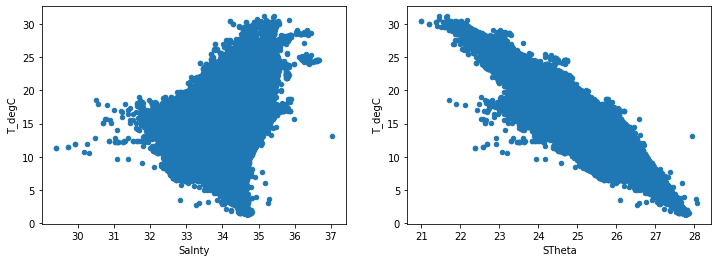

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

df.plot(x='Salnty', y='T_degC', ax=ax[0], kind='scatter')
df.plot(x='STheta', y='T_degC', ax=ax[1], kind='scatter')

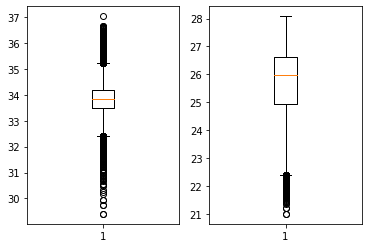

In [9]:
plt.subplot(1,2,1)
plt.boxplot(df['Salnty'])
plt.subplot(1,2,2)
plt.boxplot(df['STheta'])
plt.show()

No outliers detected in Salnty and STheta indicated by the above two plots

# Part B: Train / Test Split & Scaling



In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df[["Salnty", "STheta","O2ml_L","Depthm"]],
    df["T_degC"], test_size=.2,
    random_state=49)

In [11]:
X_scaler = preprocessing.StandardScaler()
X_scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
print(X_train_scaled)

[[ 0.18131055  0.41130349 -0.41410546 -0.22392282]
 [-0.70050528 -1.33749337  0.87173441 -0.63131776]
 [-0.53760827 -0.18715164  0.19497659 -0.46771822]
 ...
 [-0.37471125 -0.2852428   1.51465435 -0.70509794]
 [-0.2574254  -0.63103889  1.21494731 -0.6730196 ]
 [ 0.11397978  0.22403856 -0.32709374 -0.43884771]]


In [13]:
y_train = np.asarray(y_train).reshape((len(y_train), 1))

In [14]:
y_test = np.asarray(y_test).reshape((len(y_test), 1))

# Part C: Linear Regression with sklearn

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
print("Intercept :",lin_reg.intercept_)
print("coeffcients : ", lin_reg.coef_)

Intercept : [10.91693509]
coeffcients :  [[ 1.6322312  -4.63367872  0.30102984 -0.47517378]]


In [16]:
y_pred_sklearn = lin_reg.predict(X_test_scaled)


In [17]:
print('Mean squared error :   ' + str(mean_squared_error(y_test,y_pred_sklearn)))
print('R-squared :  ' + str(r2_score(y_test,y_pred_sklearn)))
print('Explained variance :  ' + str(explained_variance_score(y_test,y_pred_sklearn)))


Mean squared error :   0.11184729270739492
R-squared :  0.9937652039435104
Explained variance :  0.993765429958007


In [24]:
predict_sklearn_df = pd.DataFrame(y_pred_sklearn, columns = ["Y_Test_Predicted"])
predict_sklearn_df["Y_Test_Actual"] = y_test

Scatterplot between Y_Actual and Y_Predicted for the TEST data of T_degC


Text(0.5, 1.0, 'Y_Test_Actual vs. Y_Test_Predicted')

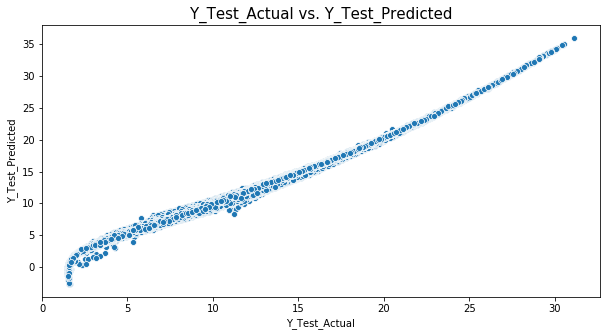

In [26]:
print("Scatterplot between Y_Actual and Y_Predicted for the TEST data of T_degC")
plt.figure(figsize=(10,5))
ay = sns.scatterplot(predict_sklearn_df["Y_Test_Actual"],predict_sklearn_df["Y_Test_Predicted"])
ay.set_xlabel("Y_Test_Actual", fontsize = 10)
ay.set_ylabel("Y_Test_Predicted", fontsize = 10)
ay.set_title("Y_Test_Actual vs. Y_Test_Predicted", fontsize = 15)

# Part D: Gradient Descent Mini-Batch

In [19]:
scaler_mb = preprocessing.StandardScaler().fit(X_train)
X_train_mb = scaler_mb.transform(X_train)
y_train_mb = np.asarray(y_train).reshape((len(y_train), 1))

X_test_mb = scaler_mb.transform(X_test)
y_test_mb = np.asarray(y_test).reshape((len(y_test), 1))

X_train_mb = np.c_[np.ones((len(X_train_mb), 1)), X_train_mb]
X_test_mb = np.c_[np.ones((len(X_test_mb), 1)), X_test_mb]

In [20]:
theta_path_mgd = []
best_thetas = []
m = len(X_train)
eta = 0.1
n_epochs = 100
minibatch_size = [50,250,2000]

np.random.seed(42)
theta = np.random.randn(5, 1)  # random initialization

for size in minibatch_size:
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_train_mb[shuffled_indices]
        y_shuffled = y_train_mb[shuffled_indices]
        for i in range(0, m, size):
            xi = X_b_shuffled[i:i + size]
            yi = y_shuffled[i:i + size]
            gradients = 4 / size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - eta * gradients
            theta_path_mgd.append(theta)
    best_thetas.append(theta)

In [27]:
print("\n\n\n\n Metrics for the TEST data Mini Batch Gradient Descent \n\n\n\n")
for i in range(len(best_thetas)):
    print(f'minibatch size: {minibatch_size[i]}')
    print(f'Coefficients: {best_thetas[i]}')
    print("\n")
    print("Test/Holdout mean squared error: %.2f"
          % metrics.mean_squared_error(y_test_mb, X_test_mb.dot(best_thetas[i])))
    print("Test/Holdout explained variance: %.2f"
          % metrics.explained_variance_score(y_test_mb, X_test_mb.dot(best_thetas[
                                                                    i])))
    print("Test/Holdout r-squared: %.2f" % metrics.r2_score(y_test_mb,
                                                       X_test_mb.dot(
                                                           best_thetas[i])))
    print("\n")





 Metrics for the TEST data Mini Batch Gradient Descent 




minibatch size: 50
Coefficients: [[10.89024182]
 [ 1.6809573 ]
 [-4.70859705]
 [ 0.34690781]
 [-0.54870715]]


Test/Holdout mean squared error: 0.13
Test/Holdout explained variance: 0.99
Test/Holdout r-squared: 0.99


minibatch size: 250
Coefficients: [[10.91398036]
 [ 1.66485134]
 [-4.67905503]
 [ 0.28790857]
 [-0.52404629]]


Test/Holdout mean squared error: 0.12
Test/Holdout explained variance: 0.99
Test/Holdout r-squared: 0.99


minibatch size: 2000
Coefficients: [[10.91167836]
 [ 1.64577039]
 [-4.64286969]
 [ 0.29640049]
 [-0.47134903]]


Test/Holdout mean squared error: 0.11
Test/Holdout explained variance: 0.99
Test/Holdout r-squared: 0.99




In [28]:
y_predict_train_mb_50 = X_train_mb.dot(best_thetas[0])
y_predict_test_mb_50 = X_test_mb.dot(best_thetas[0])

In [29]:
predict_mb_df = pd.DataFrame(y_predict_test_mb_50, columns = ["Y_Test_Predicted_mb_50"])
predict_mb_df["Y_Test_Actual_mb"] = y_test

Scatterplot between Y_Actual and Y_Predicted for the TEST data for mini-batch 50


Text(0.5, 1.0, 'Y_Test_Actual vs. Y_Test_Predicted_50')

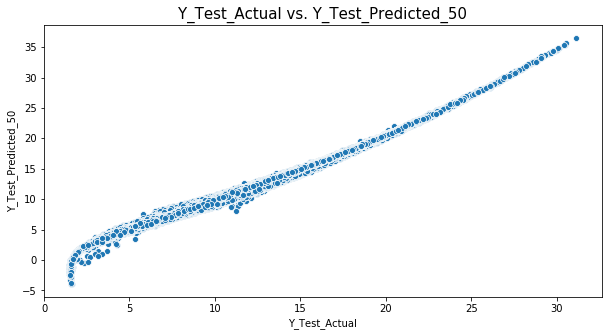

In [30]:
print("Scatterplot between Y_Actual and Y_Predicted for the TEST data for mini-batch 50")
plt.figure(figsize=(10,5))
ay = sns.scatterplot(predict_mb_df["Y_Test_Actual_mb"],predict_mb_df["Y_Test_Predicted_mb_50"])
ay.set_xlabel("Y_Test_Actual", fontsize = 10)
ay.set_ylabel("Y_Test_Predicted_50", fontsize = 10)
ay.set_title("Y_Test_Actual vs. Y_Test_Predicted_50", fontsize = 15)

In [32]:
y_predict_train_mb_250 = X_train_mb.dot(best_thetas[1])
y_predict_test_mb_250 = X_test_mb.dot(best_thetas[1])

In [33]:
predict_mb_df["Y_Test_Predicted_mb_250"] = y_predict_test_mb_250

Scatterplot between Y_Actual and Y_Predicted for the TEST data for mini-batch 250


Text(0.5, 1.0, 'Y_Test_Actual vs. Y_Test_Predicted_250')

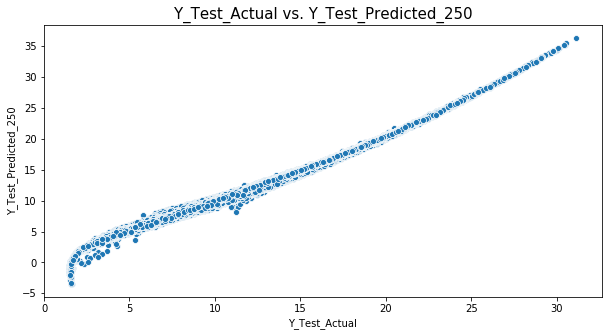

In [34]:
print("Scatterplot between Y_Actual and Y_Predicted for the TEST data for mini-batch 250")
plt.figure(figsize=(10,5))
ay = sns.scatterplot(predict_mb_df["Y_Test_Actual_mb"],predict_mb_df["Y_Test_Predicted_mb_250"])
ay.set_xlabel("Y_Test_Actual", fontsize = 10)
ay.set_ylabel("Y_Test_Predicted_250", fontsize = 10)
ay.set_title("Y_Test_Actual vs. Y_Test_Predicted_250", fontsize = 15)

In [35]:
y_predict_train_mb_2000 = X_train_mb.dot(best_thetas[2])
y_predict_test_mb_2000 = X_test_mb.dot(best_thetas[2])

In [36]:
predict_mb_df["Y_Test_Predicted_mb_2000"] = y_predict_test_mb_2000

Scatterplot between Y_Actual and Y_Predicted for the TEST data for mini-batch 2000


Text(0.5, 1.0, 'Y_Test_Actual vs. Y_Test_Predicted_2000')

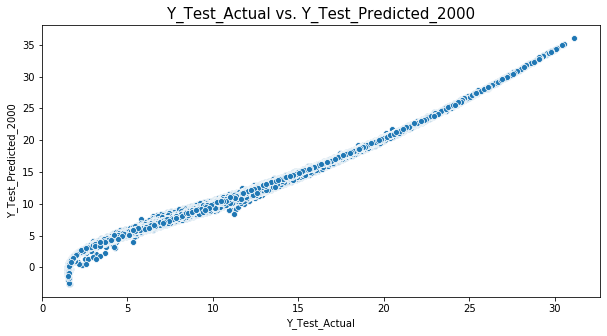

In [37]:
print("Scatterplot between Y_Actual and Y_Predicted for the TEST data for mini-batch 2000")
plt.figure(figsize=(10,5))
ay = sns.scatterplot(predict_mb_df["Y_Test_Actual_mb"],predict_mb_df["Y_Test_Predicted_mb_2000"])
ay.set_xlabel("Y_Test_Actual", fontsize = 10)
ay.set_ylabel("Y_Test_Predicted_2000", fontsize = 10)
ay.set_title("Y_Test_Actual vs. Y_Test_Predicted_2000", fontsize = 15)

In [38]:
print("\n\n\n\n Metrics for the TRAIN data")
for i in range(len(best_thetas)):
    print(f'minibatch size: {minibatch_size[i]}')
    print(f'Coefficients: {best_thetas[i]}')
    print("\n")
    print("Train mean squared error: %.2f"
          % metrics.mean_squared_error(y_train_mb, X_train_mb.dot(best_thetas[i])))
    print("Train explained variance: %.2f"
          % metrics.explained_variance_score(y_train_mb, X_train_mb.dot(best_thetas[
                                                                    i])))
    print("Train r-squared: %.2f" % metrics.r2_score(y_train_mb,
                                                       X_train_mb.dot(
                                                           best_thetas[i])))
    print("\n")





 Metrics for the TRAIN data
minibatch size: 50
Coefficients: [[10.89024182]
 [ 1.6809573 ]
 [-4.70859705]
 [ 0.34690781]
 [-0.54870715]]


Train mean squared error: 0.13
Train explained variance: 0.99
Train r-squared: 0.99


minibatch size: 250
Coefficients: [[10.91398036]
 [ 1.66485134]
 [-4.67905503]
 [ 0.28790857]
 [-0.52404629]]


Train mean squared error: 0.11
Train explained variance: 0.99
Train r-squared: 0.99


minibatch size: 2000
Coefficients: [[10.91167836]
 [ 1.64577039]
 [-4.64286969]
 [ 0.29640049]
 [-0.47134903]]


Train mean squared error: 0.11
Train explained variance: 0.99
Train r-squared: 0.99




# Part E: Conceptual Questions

1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.

No iteration is required for the estimation of the parameters/coefficients while using the normal equation because it estimates the parameters/coefficients analytically where as estimation of the parameters using the gradient descent approach is an iterative process.

Gradient descent is a first order optimization algorithm where we find the values of the parameters or coefficients that minimizes the cost function.

Normal equation is an analytical approach which is used to estimate the parameters or coefficients by find the global minimum of the cost function that corresponds to these parameters or coefficients.

Gradient descent involves the calculation of the slope of the cost function with respect to the parameters and accordingly descend by a step in order to reduce the total value of the error cost.
On the other hand, normal equation approach involves a takubg abig step where the cost is zero or almost zero by setting the slope of the cost function with respect to each of the parameters to zero.

Using the gradient descent , the parameters or coeffcients are updated incrementally after every epoch

Normal equation approach is adopted for smaller datasets with less features where as Gradient descent approach is adopted for larger complex datasets.

2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?

Mini-Batch Gradient Descent is a variation of the gradient descent that splits the training data into small batches which can then be used to calculate the error values and also update the coeffiecients or parameters of the model.

Stochastic Gradient Descent is again also a variation of the gradient descent that frequently updates the parameters or coeffcients to give insights into how the model is performing and also the rate of improvement.
Stochastic Gradient Descent is the simplest of all the variants of gradient descent


The increased parameter update frequency of the Stochastic Gradient Descent can result in faster learning in certain situations but this may back fire and result in a noisy gradient signal which may cause the coefficients or parameters to jump around i.e have higher variance.

The batching fucntionality of the mini batch gradient descent allows for both the efficiency of not having to out all the data into the run-time memory and also the batched update process is more efficient compared to Stochastic Gradient Descent. But this particular algorithm requires the configuration of an additional parameter called "mini-batch size".

3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs 
training data. Does this version of gradient descent show signs of overfitting? Explain.

Its quite apparent that the mini-batch gradient descent is the best algorithm out of all the variations of the gradient descent because it overcomes the shortcomings of all different types of gradient descent. It is the most recommended variant of gradient descent for most of the applications.
It has robust convergence and avoid the local minima problem.

For the TEST data, the explained variance and the R-squared value is 0.99 for all the mini-batch sizes of 50,250 and 2000. However the MSE is 0.13, 0.12,0.11 for the mini batch sizes of 50,250, and 2000 respectively which indicated the error rates drops as the mini batch size increases.

For the TRAINING data, the explained variance and the R-squared value is again 0.99 for all the mini-batch sizes of 50,250 and 2000. However the MSE is 0.13, 0.11,0.11 for the mini batch sizes of 50,250, and 2000 respectively which is almost similar to the TEST/HOLDOUT data results.

Both the TRAIN and HOLDOUT results are shockingly accurate and moreover the R-squared value of 0.99 is quite suspicious. Variance is quite high which is another factor indicating overfitting . So reduction in the number of features is definitely one of the solutions and also increasing the batch size could be of tremendous help in the regularization of the model.

4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate 
over time?

The learning rate is the measure of parameters or coefficients getting updated during gradient descent. The learning rate controls how quickly the model learns about the data and adapts to the problem in hand. Learning rate in most if the cases is a configurable parameter and oftent ranges between 0.0 and 1.0.
Smaller learning rates require more number of iterations or epochs because it makes smaller changes or updates to the parameters or coeffcients. The larger learning rates require fewer iterations or epochs and result in rapid changes to the coefficients or model parameters.
If the learnibg rate is too large , it can cause the model to converge too quickly . On the other hand if the learning rate is too low , it stagnates the learning process.


It is a good practice to start with a low learning rate in the beginning and increasing it exponentially or linearly at each iteration. If the learning rate , it may take a lot of time to converge whereas if the learning rate is high , we may slide over the global minima very quickly. 
So changing the learning rate over time helps in rapid traversal of the saddle point plateaus where the learning process becomes really slow.

5) Why would a data scientist want to use early stopping in gradient descent? 

Early stopping is a technique that is used to avoid the overfitting problem. In the gradient descent problems, it is really difficult to monitor the convergence of the loss function. 
If the dataset is large enough and complex, training process will slow down and the model will stop generalizing and start learning the statistical noise in the training data. So when this trained model is exposed to new data , it cannot make accurate predictions.

To overcome the problem of convergence in most of the cases ,we include a validation set besides the test dataset. 
If the performance of the validation set falls with multiple iterations , then the trainibg process is stopped in order to make sure that the variance is low because trainibg further may increase the variance and make the model overfit. 
Early stopping can significantly reduce the training time . It determines how many iterations the model has to go through before we start seeing signs of overfitting.

The entire concept of early stopping is to train our model long enough so that it generalizes on the input data but no training the model for too long that it learns the unnecessary noise within the data.